In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import kagglehub
import os

In [2]:
# Load the Iris Dataset

path = kagglehub.dataset_download("saurabh00007/iriscsv")
print("Path to dataset files:", path)

100%|██████████| 1.28k/1.28k [00:00<00:00, 2.59MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/saurabh00007/iriscsv/versions/1


In [3]:
# Read the CSV file

csv_path = os.path.join(path, "Iris.csv")
df = pd.read_csv(csv_path)

In [4]:
# Initial Data Overview

print("Dataset Shape:", df.shape)
print("\nAll Dataset Samples:\n")
print(df.to_string(index=False))

Dataset Shape: (150, 6)

All Dataset Samples:

 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
  1            5.1           3.5            1.4           0.2     Iris-setosa
  2            4.9           3.0            1.4           0.2     Iris-setosa
  3            4.7           3.2            1.3           0.2     Iris-setosa
  4            4.6           3.1            1.5           0.2     Iris-setosa
  5            5.0           3.6            1.4           0.2     Iris-setosa
  6            5.4           3.9            1.7           0.4     Iris-setosa
  7            4.6           3.4            1.4           0.3     Iris-setosa
  8            5.0           3.4            1.5           0.2     Iris-setosa
  9            4.4           2.9            1.4           0.2     Iris-setosa
 10            4.9           3.1            1.5           0.1     Iris-setosa
 11            5.4           3.7            1.5           0.2     Iris-setosa
 12            4.

In [5]:
# Descriptive Statistics

print("Descriptive Statistics")
print(df.describe())

Descriptive Statistics
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
# Class Distributions

print("Class Distribution")
print(df['Species'].value_counts())

Class Distribution
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [7]:
# Drop unnecessary columns

if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

In [8]:
# Encode Target Variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Training
X = df.drop('Species', axis=1)
y = df['Species']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [9]:
# Train the Classifier

model = RandomForestClassifier(n_estimators=100, random_state=101)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

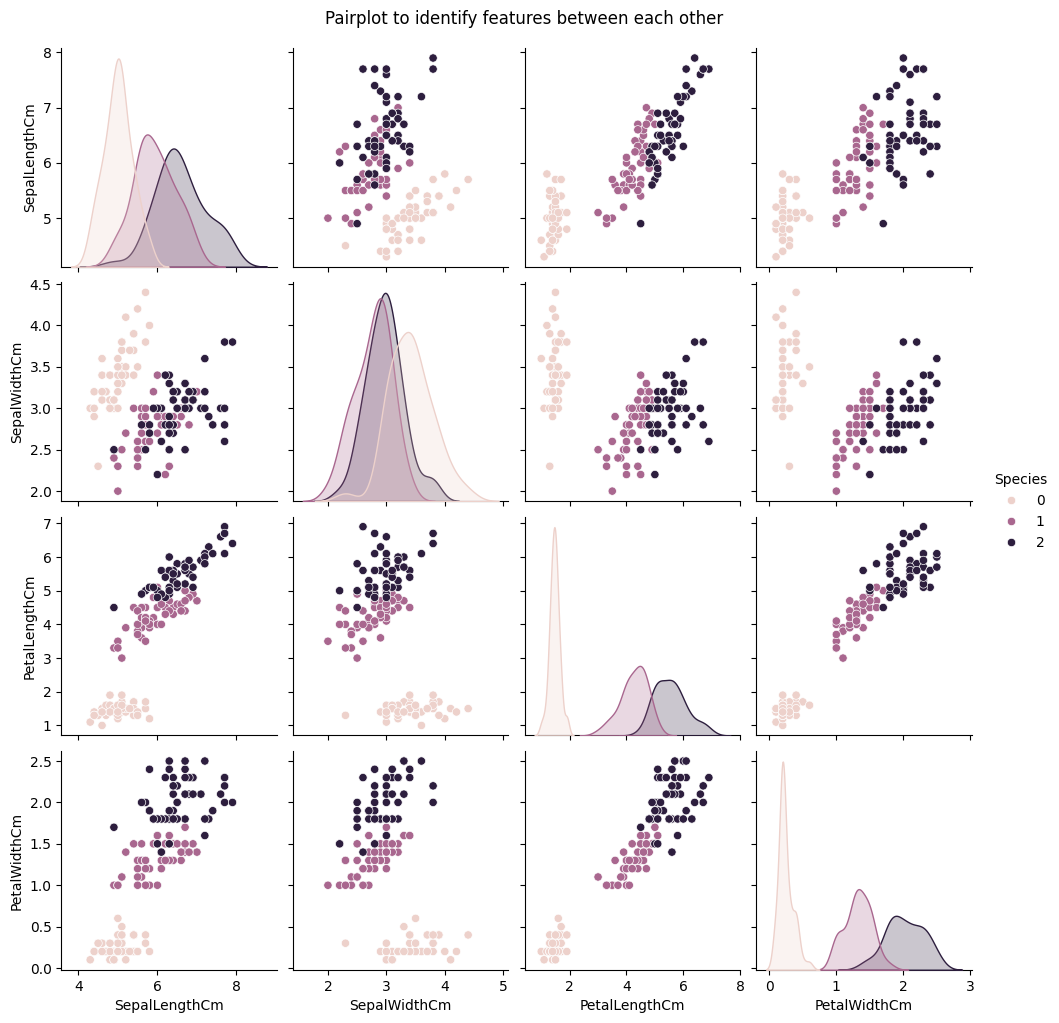

In [10]:
# Pairplot

sns.pairplot(df, hue='Species')
plt.suptitle("Pairplot to identify features between each other", y=1.02)
plt.show()

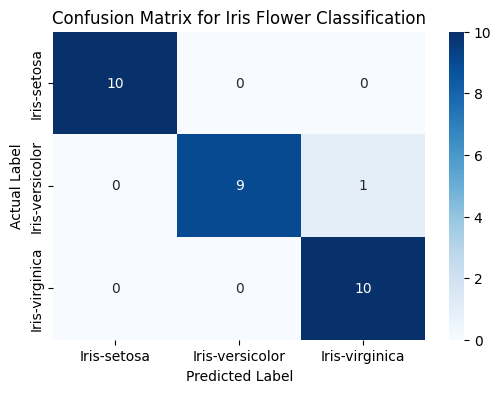

In [11]:
# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Iris Flower Classification")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [12]:
# Classification and Accuracy Report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy Score: 96.67 %
